<a href="https://colab.research.google.com/github/Zekun-Yang/Boston_house-price/blob/master/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the txt data from the URL and convert it into a csv file

In [1]:
import pandas as pd
import requests
import urllib
from sklearn.model_selection import train_test_split
url = "http://lib.stat.cmu.edu/datasets/boston"

file = urllib.request.urlopen(url)
file_text = file.read().decode("utf-8")
file_text = file_text.splitlines()[22:]

with open("raw_data.txt", "w") as text_file:
  for index in range(0, len(file_text), 2):
    text_file.write(file_text[index] + file_text[index + 1] + "\n")

data = pd.read_csv('raw_data.txt',sep="\s+", header=None)
data.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]


#a quick look at the first 5 lines of the data
print("The shape of the data:{} ".format(data.shape))
data.head()


The shape of the data:(506, 14) 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
#check whether the data is complete
data.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [3]:
#split data into 2 groups (traning set and testing set)
x_train, x_test = train_test_split(data, test_size=0.2)
y_train = x_train.pop('MEDV')
y_test = x_test.pop('MEDV')


# normalisation
x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()





In [4]:
#create a NN model
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

def create_model():
  model = keras.Sequential([
      layers.Flatten(input_shape=(13,1)),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
    ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model


In [5]:
NN_model = create_model()

#have a look at the summary of the NN model
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 13)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [6]:
#train the model

train_info = NN_model.fit(
    x_train, y_train, epochs=500, validation_split = 0.2, verbose=0
)

In [7]:
#evaluate the model
loss, mae, mse = NN_model.evaluate(x_test, y_test,verbose=2)


4/4 - 0s - loss: 11.6113 - mae: 2.4211 - mse: 11.6113


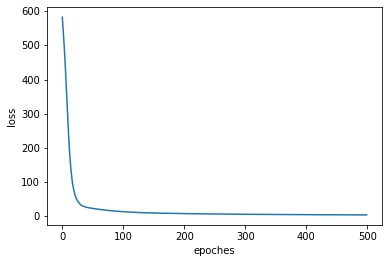

In [8]:
import matplotlib.pyplot as plt
# visualise the trainning prograss 

hist = pd.DataFrame(train_info.history)
hist['epoches'] = train_info.epoch
plt.figure()
plt.xlabel('epoches')
plt.ylabel('loss')
plt.plot(hist['epoches'], hist['loss'])


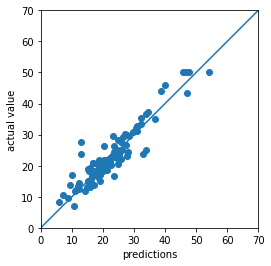

In [25]:
#a comparison between predictions and true values
predictions = NN_model.predict(x_test).flatten()

plt.scatter(predictions, list(y_test))
plt.xlabel('predictions')
plt.ylabel('actual value')
plt.axis('square')
plt.xlim([0,70])
plt.ylim([0,70])
plt.plot([-100, 100], [-100, 100])